# Importing libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2,glob
from keras.models import load_model
%matplotlib inline

# connecting to G-drive for importing saved weights

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing dataset images

- Importing data from the images file

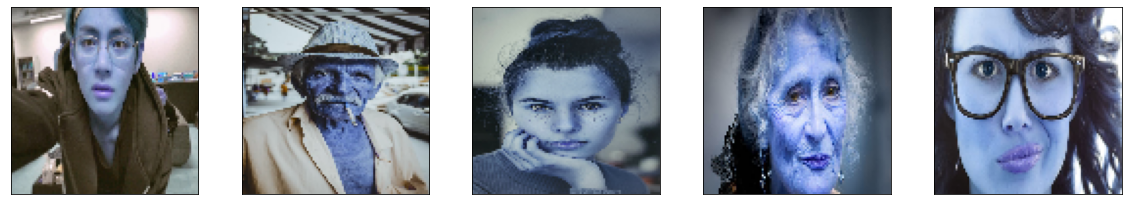

In [28]:
items = glob.glob('/content/*')

#print(items[0])
images = []


for each_image in items:
    if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):
      image = cv2.imread(each_image)
      image = cv2.resize(image, (96,96))
      images.append(image)

images = np.array(images)
np.shape(images)

plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()
#!rm -rf /content/images

# Face detection

- cropping data for Face detection using cascadeclassifier

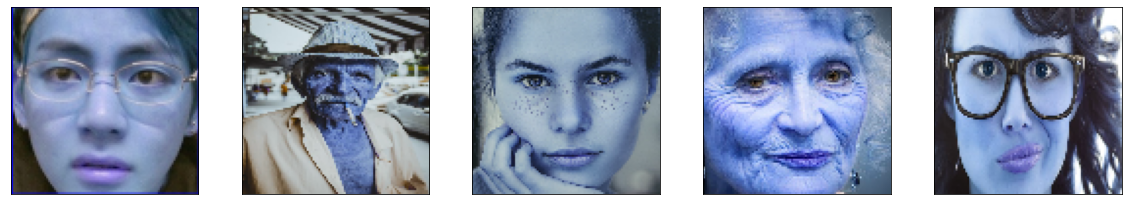

In [29]:
img = []
for each_image in items:
  if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):

    image = cv2.imread(each_image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')  
      # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), 
                        (0, 0, 255), 2)
        faces = image[y:y + h, x:x + w]
    try:
      faces = cv2.resize(faces, (96,96))
      img.append(faces)
    except:
      image = cv2.resize(image, (96,96))
      img.append(image)

img = np.array(img)
np.shape(img)

plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[i], cmap=plt.cm.binary)
plt.show()

# Preprocessing

-  Normalizing i.e. scaling the pixels to 0-1 from 0-255

In [30]:

#normalizaiton
original_test_images = images / 255.0
face_test_images = img / 255.0



# Visualize Prediction for wrinkels attribute using saved model weights in .h5 file
- prediction test images for hair top attribute using saved model weights in .h5 file  by the vgg16 model

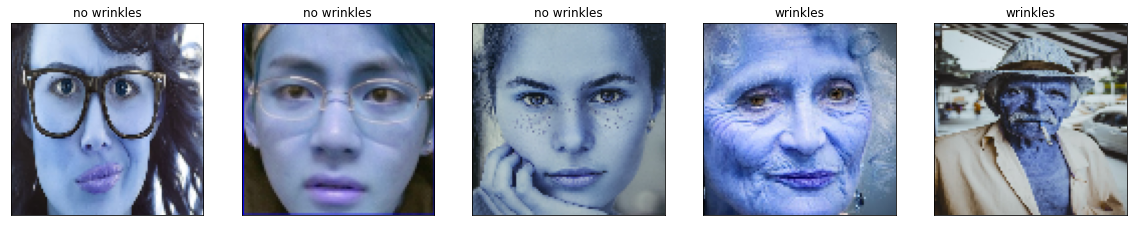

In [31]:
wrinkles_names = ['no wrinkles', 'wrinkles']

# here you need to specify the saved model from before
filepath = "/content/gdrive/MyDrive/VGG16_for_wrinkles.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
y_hat = new_model.predict(face_test_images)
w_predict_index = np.argmax(y_hat, axis = 1)


figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(face_test_images.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(face_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    # Set the title for each image
    ax.set_title("{}".format(wrinkles_names[predict_index]))


# Visualize Prediction for freakles attribute using saved model weights in .h5 file



- prediction test images for hair top attribute using saved model weights in .h5 file  by the vgg16 model

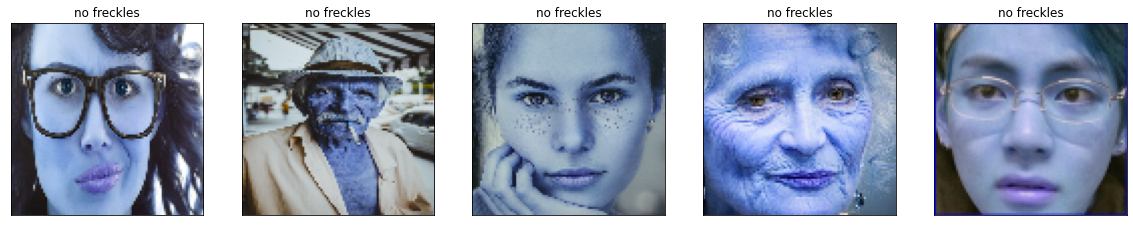

In [32]:
freckles_names = ['no freckles', 'freckles']

# here you need to specify the saved model from before
filepath = "/content/gdrive/MyDrive/VGG16_for_freakles.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
y_hat = new_model.predict(face_test_images)
f_predict_index = np.argmax(y_hat, axis = 1)



figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(face_test_images.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(face_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    # Set the title for each image
    ax.set_title("{}".format(freckles_names[predict_index]))


# Visualize Prediction for glasses attribute using saved model weights in .h5 file



- prediction test images for hair top attribute using saved model weights in .h5 file  by the vgg16 model

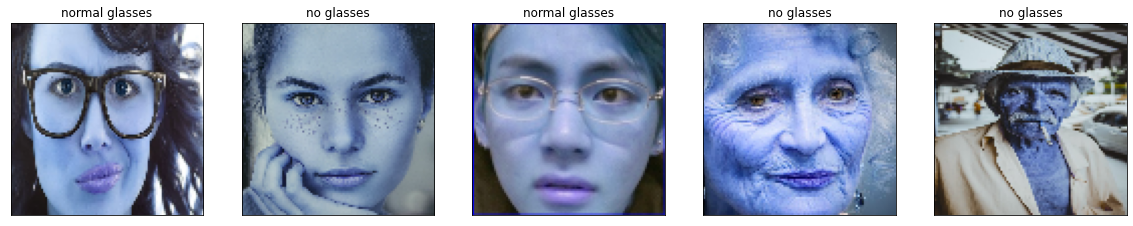

In [33]:
glasses_names = ['no glasses', 'normal glasses', 'sun glasses']

# here you need to specify the saved model from before
filepath = "/content/gdrive/MyDrive/VGG16_for_glasses.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
y_hat = new_model.predict(face_test_images)
g_predict_index = np.argmax(y_hat, axis = 1)


figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(face_test_images.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(face_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    # Set the title for each image
    ax.set_title("{}".format(glasses_names[predict_index]))


# Visualize Prediction for Hair color attribute using saved model weights in .h5 file




- prediction test images for hair top attribute using saved model weights in .h5 file  by the vgg16 model

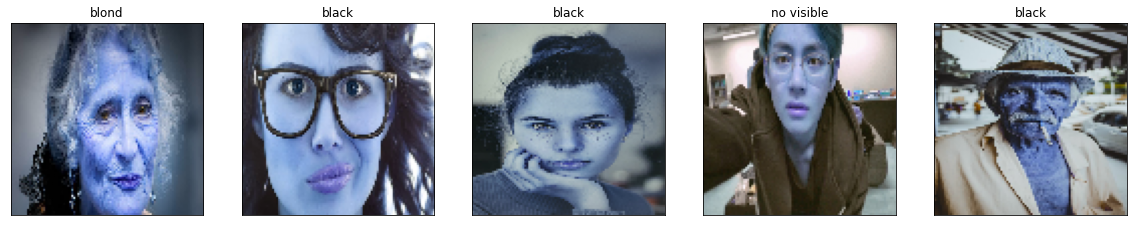

In [34]:
haircolor_names = ['brown', 'black', 'gray', 'blond', 'red', 'white', 'mixed', 'other', 'no visible']

# here you need to specify the saved model from before
filepath = "/content/gdrive/MyDrive/VGG16_for_haircolor.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
y_hat = new_model.predict(original_test_images)
hc_predict_index = np.argmax(y_hat, axis = 1)


figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(original_test_images.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(original_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    # Set the title for each image
    ax.set_title("{}".format(haircolor_names[predict_index]))


# Visualize Prediction for Hair Top attribute using saved model weights in .h5 file



- prediction test images for hair top attribute using saved model weights in .h5 file  by the vgg16 model

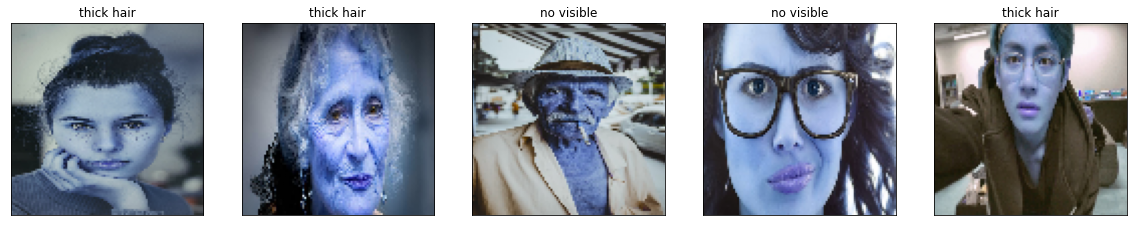

In [35]:
hairtop_names = ['bald or shaved', 'thin hair', 'thick hair', 'no visible']

# here you need to specify the saved model from before
filepath = "/content/gdrive/MyDrive/VGG16_for_hairtop.h5"

# load the model
new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
y_hat = new_model.predict(original_test_images)
ht_predict_index = np.argmax(y_hat, axis = 1)


figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(original_test_images.shape[0], size=5, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(original_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    # Set the title for each image
    ax.set_title("{}".format(hairtop_names[predict_index]))

# The predictions are stored in a csv file

In [36]:
items = glob.glob('/content/*')
j = []
for each_image in items:
  if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):
    j.append(each_image)
print(j)

outputs1 = []

for elem in j:
   line = elem.split('/')
   a = line[2]
   outputs1.append(a)

print(len(outputs1))
c = np.array(ht_predict_index)
print(c)

annotations = pd.DataFrame({
    'Image_name': outputs1,
    'wrinkles': w_predict_index,
    'freakles': f_predict_index,
    'glasses': g_predict_index,
    'hair_color': hc_predict_index,
    'hair_top': ht_predict_index
})

print(annotations)

from google.colab import files
annotations.to_csv('annotations.csv', index = False) 
files.download('annotations.csv')

['/content/main-qimg-db8e54b86666340371e786f17b3b7b85.jpeg', '/content/pexels-photo-1933873.jpeg', '/content/photo-1554151228-14d9def656e4.jpeg', '/content/face-wrinkles-1200.jpeg', '/content/Hero_Article_Problem-Woman-compressor.jpeg']
5
[2 3 2 2 3]
                                        Image_name  ...  hair_top
0  main-qimg-db8e54b86666340371e786f17b3b7b85.jpeg  ...         2
1                        pexels-photo-1933873.jpeg  ...         3
2               photo-1554151228-14d9def656e4.jpeg  ...         2
3                          face-wrinkles-1200.jpeg  ...         2
4       Hero_Article_Problem-Woman-compressor.jpeg  ...         3

[5 rows x 6 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>